# B"H




# What is the True Normal Human Body Temperature? 

#### Background
- The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. 
- But, is this value statistically correct?


In [2]:
import os
import sys

import math

import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt

import seaborn as sns

---
## Set the plot output sizes

In [2]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Prior size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

print ("Current size:", fig_size)

Prior size: [6.0, 4.0]
Current size: [12, 9]


---
## Get project info

In [3]:
NOTEBOOKS_DIR = os.path.join(os.pardir)

print(os.path.abspath(NOTEBOOKS_DIR))

/home/laz/repos/springboard-mini-projects/notebooks


In [4]:
PROJ_ROOT = os.path.join(NOTEBOOKS_DIR,os.pardir)

print(os.path.abspath(PROJ_ROOT))

/home/laz/repos/springboard-mini-projects


In [5]:
# add the 'src' directory as one where we can import modules
SRC_DIR = os.path.join(PROJ_ROOT, 'src')
sys.path.append(SRC_DIR)

print(os.path.abspath(SRC_DIR))

/home/laz/repos/springboard-mini-projects/src


In [6]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

# import my method from the source code
%aimport helper_functions
import helper_functions as hf

---
## Import the data:

In [7]:
temp_df = hf.read_csv(
    p_dir       = hf.DATA_DIR,
    p_file_name = 'human_body_temperature.csv'
)

temp_df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [8]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [9]:
temp_df['gender'].unique()

array(['F', 'M'], dtype=object)

In [10]:
temp_df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [11]:
temp_vals = temp_df['temperature'].values

temp_f_vals = temp_df[temp_df['gender'] == 'F']['temperature'].values
temp_m_vals = temp_df[temp_df['gender'] == 'M']['temperature'].values

In [12]:
# Compute mean and standard deviation:

mu      = np.mean(temp_vals)
sigma   = np.std(temp_vals)

f_mu    = np.mean(temp_f_vals)
f_sigma = np.std(temp_f_vals)

m_mu    = np.mean(temp_m_vals)
m_sigma = np.std(temp_m_vals)

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

print("mean of temp (M&F)               :", mu)
print("standard deviation of temp (M&F) :", sigma)
print("-  -  -  -  -  -  -  -  -  -  -  -  -  ")
print("mean of temp (F)                 :", f_mu)
print("standard deviation of temp (F)   :", f_sigma)
print("-  -  -  -  -  -  -  -  -  -  -  -  -  ")
print("mean of temp (M)                 :", m_mu)
print("standard deviation of temp (M)   :", m_sigma)

mean of temp (M&F)               : 98.24923076923075
standard deviation of temp (M&F) : 0.730357778905038
-  -  -  -  -  -  -  -  -  -  -  -  -  
mean of temp (F)                 : 98.39384615384614
standard deviation of temp (F)   : 0.7377464486428966
-  -  -  -  -  -  -  -  -  -  -  -  -  
mean of temp (M)                 : 98.10461538461537
standard deviation of temp (M)   : 0.6933598841828699


---
## **Question 1**: is the distribution of body temperatures normal?


---

### Question 1 - Approach 1
### Check the normality of the distribution using histograms:

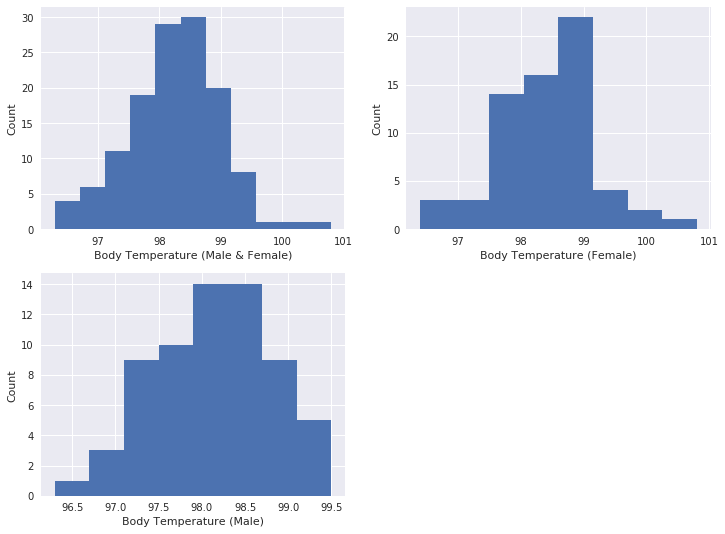

In [13]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Set default Seaborn style
sns.set()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 2x2 subplot layout and make the top left subplot active
_ = plt.subplot(2, 2, 1)

_ = plt.hist(
    temp_vals, 
    bins=hf.get_srr_bins(temp_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Male & Female)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 2)

_ = plt.hist(
    temp_f_vals, 
    bins=hf.get_srr_bins(temp_f_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Female)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 3)

_ = plt.hist(
    temp_m_vals, 
    bins=hf.get_srr_bins(temp_m_vals) # Get number of bins using the "square root rule"
)


# Label axes
_ = plt.xlabel('Body Temperature (Male)')
_ = plt.ylabel('Count')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Show histograms
plt.show()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- When plotting male and female together the histogram looks somewhat normal
- However, even in there the data is skewed to the left


---

### Question 1 - Approach 2
### Check the normality of the distribution using box plots:

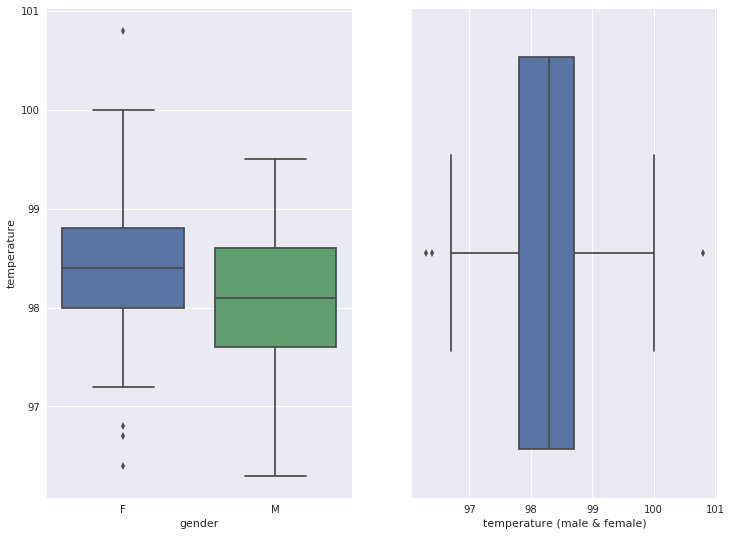

In [14]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 1x2 subplot layout and make the left subplot active
_ = plt.subplot(1, 2, 1)

# Create box plot with Seaborn's default settings
_ = sns.boxplot(
    x    = 'gender', 
    y    = 'temperature', 
    data = temp_df
)

# Label the axes
_ = plt.xlabel('gender')
_ = plt.ylabel('temperature')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(1, 2, 2)

# Create box plot with Seaborn's default settings
_ = sns.boxplot(
    x    = 'temperature',     
    data = temp_df
)

# Label the axes
_ = plt.xlabel('temperature (male & female)')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Show the plot
plt.show()
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- When plotting male and female together the box-plot looks appears more normal

---
### Question 1 - Approach 3
### Check the normality of the distribution using ECDF's:

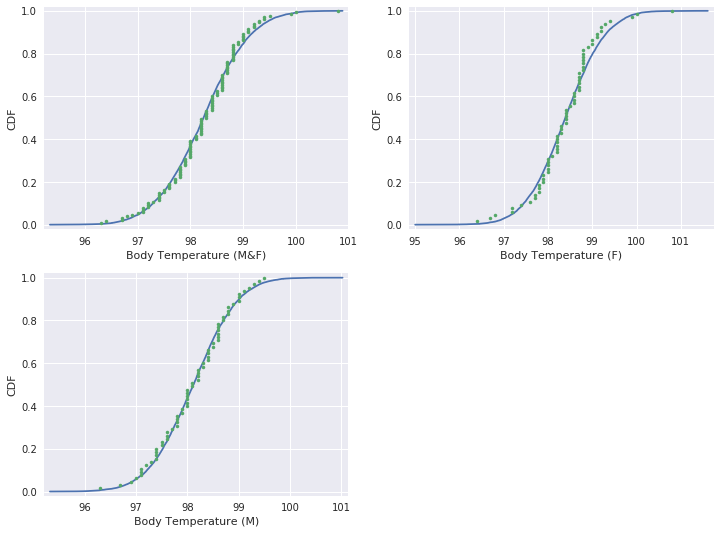

In [15]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create a figure with 2x2 subplot layout and make the top left subplot active
_ = plt.subplot(2, 2, 1)

# Sample out of a normal distribution with this mu and sigma:
samples = np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(samples)
x, y             = hf.ecdf(temp_vals)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (M&F)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 2)

f_samples = np.random.normal(f_mu, f_sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = hf.ecdf(f_samples)
x, y             = hf.ecdf(temp_f_vals)

# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (F)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.subplot(2, 2, 3)

m_samples = np.random.normal(m_mu, m_sigma, size=10000)

x_theor, y_theor = hf.ecdf(m_samples)
x, y             = hf.ecdf(temp_m_vals)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')

plt.margins(0.02)

_ = plt.xlabel('Body Temperature (M)')
_ = plt.ylabel('CDF')
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


plt.show()

### Result:
- Looks for the most part normal when plotting M and F together.
- Although, at some points, it does moves away from the normal model

---
### Question 1 - Approach 4
### Check the normality of the distribution using Normal Probability Plots
- If the distribution of the sample is approximately normal, the result is a **straight line** with 
    - **intercept mu** 
    - **slope sigma**


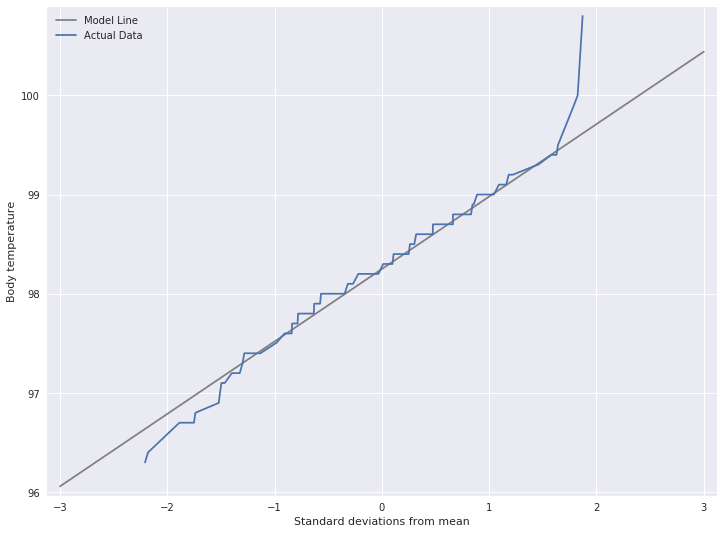

In [16]:
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    
x_line, y_line = hf.get_x_y_for_line(
    bounds      = [-3, 3], 
    y_intercept = mu, 
    slope       = sigma
)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
x, y = hf.get_x_y_for_norm_plot(temp_vals)
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
_ = plt.plot(
    x_line, 
    y_line, 
    color = 'gray', 
    label = 'Model Line'
)

_ = plt.plot(
    x, 
    y, 
    label = 'Actual Data')
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
plt.margins(0.02)

_ = plt.legend(loc='upper left')
_ = plt.xlabel('Standard deviations from mean')
_ = plt.ylabel('Body temperature')

plt.show()
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- The curve matches the model near the mean but deviates in the tails.

---
## **Question 2.a**: Is the sample size large? 

### Answer: Yes
- To use CLT, rule of thumb is to have sample size > 30 or 50. 
- Sample size here is 130


## **Question 2.b**: Are the observations independent?
### Answer: Yes
- Each observation in the data is a measurement from a different person.
- One person's body temperature doesn't have an affect on another person's body temperature 

---
## **Question 3.a**: Is the true population mean really 98.6 degrees F?  
- Use bootstrap hypothesis test.

In [17]:
sample_mean = np.mean(temp_vals)

sample_mean

98.24923076923075

In [18]:
hypothesized_mean = 98.6

In [19]:
sample_shifted = temp_vals - sample_mean + hypothesized_mean

### Plot ECDF to check the impact:

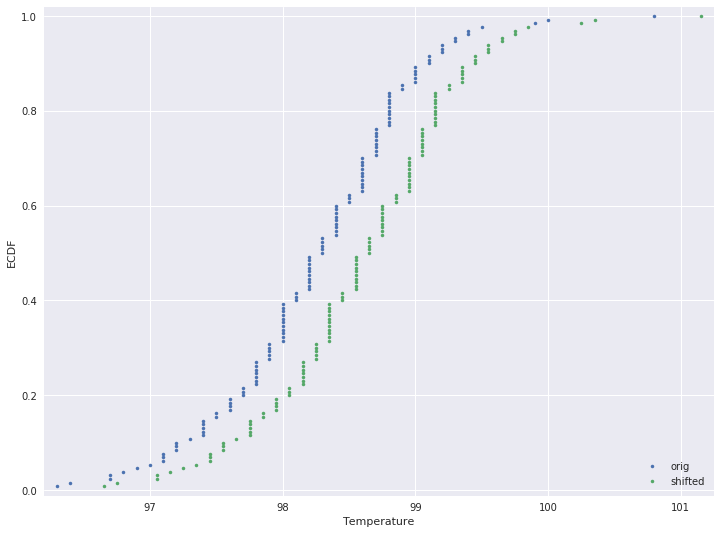

In [20]:
# Compute x,y values for ECDFs
x_orig,    y_orig    = hf.ecdf(temp_vals)
x_shifted, y_shifted = hf.ecdf(sample_shifted)

# Plot the ECDFs
plt.plot(x_orig,    y_orig,    marker='.', linestyle='none')
plt.plot(x_shifted, y_shifted, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('orig', 'shifted'), loc='lower right')

# Label axes and show plot
plt.xlabel('Temperature')
plt.ylabel('ECDF')
plt.show()

### Null Hypothesis 
- The true mean temperature is 98.6.
- I.e. we would have actually gotten the same mean if we would have repeated our sample data collection lots and lots of times.


### The Test Statistic

In [21]:
def diff_from_hyp(data, hypothesized_mean = 98.6):
    return np.mean(data) - hypothesized_mean

In [22]:
diff_observed = diff_from_hyp(temp_vals)

print(diff_observed)

-0.35076923076924515


### Compute the p-value

In [23]:
bs_replicates = hf.draw_bootstrap_replicates(sample_shifted, diff_from_hyp, 10000)

In [24]:
p_value = np.sum(bs_replicates <= diff_observed) / 10000

p_value

0.0

### Plot the histogram

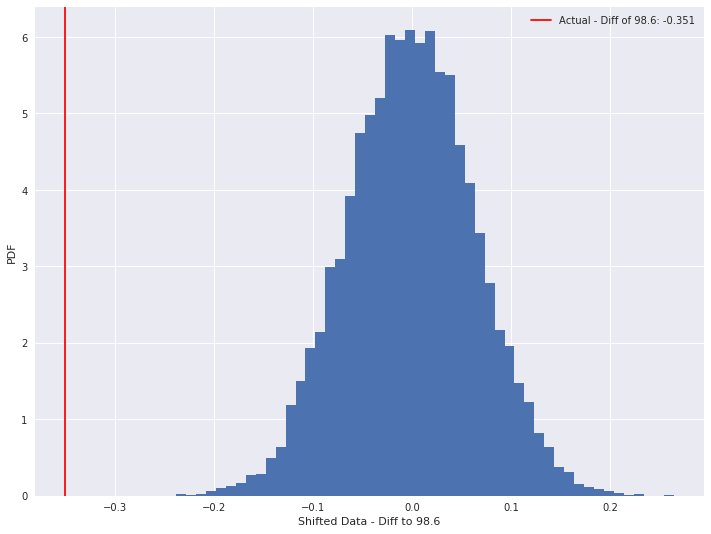

In [25]:
# Plot the histogram
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Shifted Data - Diff to 98.6')
_ = plt.ylabel('PDF')


_ = plt.axvline(
    x     = diff_observed,
    color = 'red',
    label = 'Actual - Diff of 98.6: '+str(round(diff_observed, 3))
)

plt.legend(loc='upper right')

plt.show()

### Conclusion: null hypothesis is rejected.

---
## **Questions 3.b**: Is the true population mean really 98.6 degrees F?  
- Use frequentist statistical testing.

#### Question: 
- Would you use a one-sample or two-sample test? Why?

#### Answer: 
- We'll use a one-sample test being that we're comparing to a single value. 

#### Question: 
- In this situation, is it appropriate to use the $t$ or $z$ statistic?

#### Answer: 
- We'll use a t-statistic being that the population standard deviation is unknown. 
- Though a t-test is best for small samples, it becomes similar to the z-test with large samples, so the results shouldn't differ much.

--- 

### Single Sample t-test

In [26]:
hypothesized_mean = 98.6

sample_mean = np.mean(temp_vals)
sample_std  = np.std(temp_vals, ddof=1) # using ddof=1 for sample std 
sample_size = len(temp_vals)

print('hypothesized_mean :', hypothesized_mean)
print('sample_mean       :', sample_mean)
print('sample_std        :', sample_std)
print('sample_size       :', sample_size)

hypothesized_mean : 98.6
sample_mean       : 98.24923076923075
sample_std        : 0.7331831580389456
sample_size       : 130


In [27]:
t, sem = hf.z_t_test_single_sample(
    p_sample_mean       = sample_mean, 
    p_hypothesized_mean = hypothesized_mean,
    p_provided_std      = sample_std, 
    p_sample_size       = sample_size
)

print(t, sem)

-5.4548232923645195 0.06430441683789102


In [28]:
lower_critical_value, upper_critical_value = hf.get_two_tailed_critical_values(p_alpha = .01)

lower_critical_value, upper_critical_value

(0.005, 0.995)

In [29]:
df = sample_size - 1

lower_critical_t = stats.t.ppf(lower_critical_value, df)

upper_critical_t = stats.t.ppf(upper_critical_value, df)

In [30]:
lower_critical_t, upper_critical_t, t

(-2.6144786796997836, 2.614478679699783, -5.4548232923645195)

In [31]:
if lower_critical_t <= t <= upper_critical_t:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


### Let's do the same test using the mean body temperatures at the critical $t$ values

In [32]:
lower_critical_mean = hf.get_val_at_standard_score(
    p_standard_score    = lower_critical_t, 
    p_hypothesized_mean = hypothesized_mean,
    p_sem               = sem    
)

upper_critical_mean = hf.get_val_at_standard_score(
    p_standard_score    = upper_critical_t, 
    p_hypothesized_mean = hypothesized_mean,
    p_sem               = sem
)

In [33]:
lower_critical_mean, upper_critical_mean, sample_mean

(98.43187747316681, 98.76812252683318, 98.24923076923075)

In [34]:
if lower_critical_mean <= sample_mean <= upper_critical_mean:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


---
### Let's do the same test using p-value
- In the p-value method, we ask how much area (probability) is beyond the test-statistic of $t$

In [35]:
p_value = stats.t.cdf(t, df)

print(round(p_value, 4))

0.0


In [36]:
lower_critical_value, upper_critical_value

(0.005, 0.995)

In [37]:
if lower_critical_value <= p_value <= upper_critical_value:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


---
### Plot the t-test

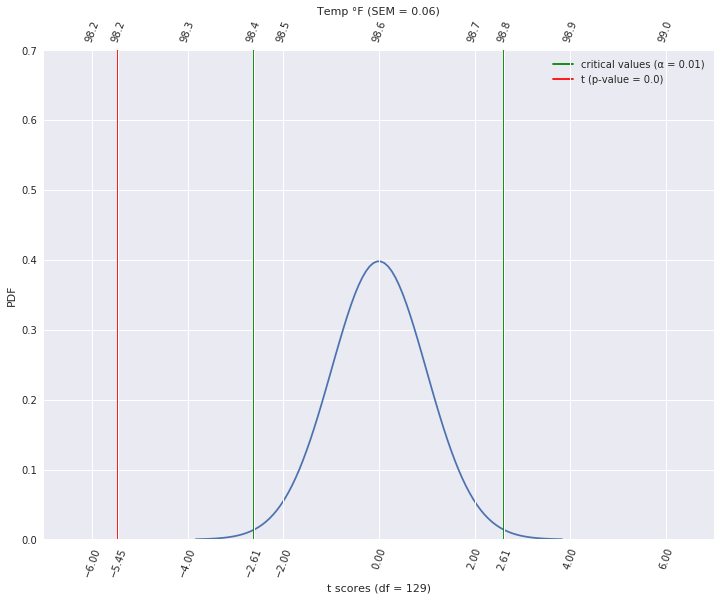

In [38]:
hf.plot_two_tailed_t_test(
    p_hypothesized_mean = 98.6, 
    p_data              = temp_vals, 
    p_alpha             = .01, 
    p_data_content_desc = 'Temp \u00b0F'
)

--- 

### Same single sample t-test using **scipy.stats**

In [39]:
t, p_value = stats.ttest_1samp(temp_vals, hypothesized_mean)

print('t       :', round(t, 4))
print('p-value :', round(p_value, 4))

t       : -5.4548
p-value : 0.0


---

### Single Sample z-test
- The z-test, in this case, is not the most appropriate being that the population standard deviation is not known. 
- However, we'll approximate it using the sample standard deviation instead

In [40]:
hypothesized_mean = 98.6

sample_mean = np.mean(temp_vals)
sample_std  = np.std(temp_vals, ddof=0) # using ddof=0 because we're appropriating the population std 
sample_size = len(temp_vals)

print('hypothesized_mean :', hypothesized_mean)
print('sample_mean       :', sample_mean)
print('sample_std        :', sample_std)
print('sample_size       :', sample_size)

hypothesized_mean : 98.6
sample_mean       : 98.24923076923075
sample_std        : 0.730357778905038
sample_size       : 130


In [41]:
z, sem = hf.z_t_test_single_sample(
    p_sample_mean       = sample_mean, 
    p_hypothesized_mean = hypothesized_mean,
    p_provided_std      = sample_std, # we don't have the population std, hence using sample std
    p_sample_size       = sample_size
)

In [42]:
z, sem

(-5.4759252020785585, 0.06405661469519337)

In [43]:
lower_critical_value, upper_critical_value

(0.005, 0.995)

In [44]:
lower_critical_z = stats.norm.ppf(lower_critical_value)

upper_critical_z = stats.norm.ppf(upper_critical_value)

In [45]:
lower_critical_z, upper_critical_z, z

(-2.575829303548901, 2.5758293035489004, -5.4759252020785585)

In [46]:
# Show prior t values to compare againt z values
lower_critical_t, upper_critical_t, t

(-2.6144786796997836, 2.614478679699783, -5.4548232923645195)

In [47]:
if lower_critical_z <= z <= upper_critical_z:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


### Let's do the same test using the mean body temperatures at the z-crit points

In [48]:
lower_critical_mean = hf.get_val_at_standard_score(
    p_standard_score    = lower_critical_z, 
    p_hypothesized_mean = hypothesized_mean,
    p_sem               = sem
)

upper_critical_mean = hf.get_val_at_standard_score(
    p_standard_score    = upper_critical_z, 
    p_hypothesized_mean = hypothesized_mean,
    p_sem               = sem
)

In [49]:
lower_critical_mean, upper_critical_mean, sample_mean

(98.43500109478198, 98.76499890521801, 98.24923076923075)

In [50]:
if lower_critical_mean <= sample_mean <= upper_critical_mean:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


---
### Let's do the same test using p-value
- In the p-value method, we ask how much area (probability) is beyond the test-statistic of $z$

In [51]:
p_value = stats.norm.cdf(z)

print(round(p_value, 4))

0.0


In [52]:
lower_critical_value, upper_critical_value

(0.005, 0.995)

In [53]:
if lower_critical_value <= p_value <= upper_critical_value:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


---
## Plot the z-test

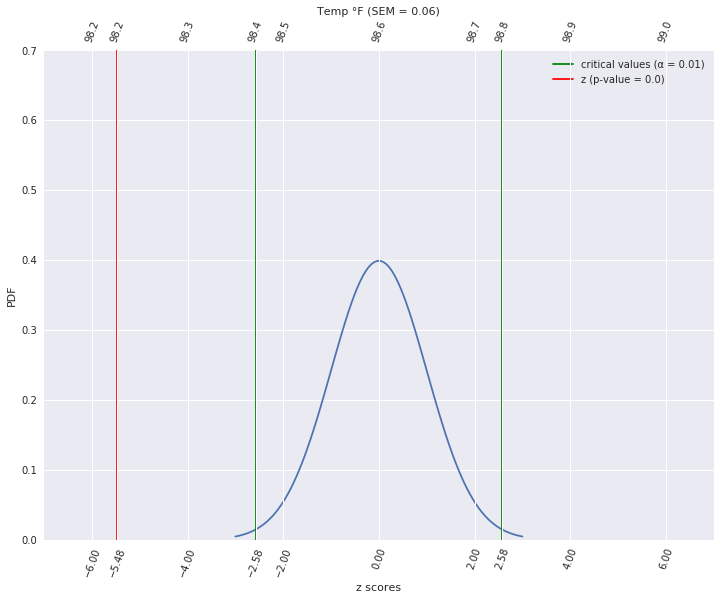

In [54]:
hf.plot_two_tailed_z_test(
    p_hypothesized_mean = 98.6, 
    p_data              = temp_vals, 
    p_alpha             = .01, 
    p_data_content_desc = 'Temp \u00b0F'
)

---
## **Questions 4**: Draw a small sample of size 10 from the data and repeat both frequentist tests.  

#### Question:
- Which one is the correct one to use?

#### Answer:
- In this case we should use a t-test being that the population standard deviation is unkown and the sample size is small.


#### Question:
- After running the test what do you notice?

#### Answer:
- The test statistic falls outside the t-distribution when using a Type I error rate (significance level) of .05
- The test statistic falls inside the t-distribution when using a Type I error rate (significance level) of .01
- When using the z-test the null hypothesis is rejected for both .05 and .01 significance levels
- Both tests provide evidence to reject the null hypothesis. 
- The difference in results reflects the nature of the two distributions. 
- The t-distribution is wider so there is more variability. 
- This makes the t-test less sensitive.


### Get sample of 10

In [55]:
# Seed the random number generator:
np.random.seed(15)


# Draw a random sample of 10 from the temperature data:
sample = np.random.choice(temp_vals, size=10)
sample

array([98.4, 97.9, 97.1, 98.7, 98.2, 98.4, 98.2, 98.8, 96.7, 96.4])

### Run t-test with alpha of .05

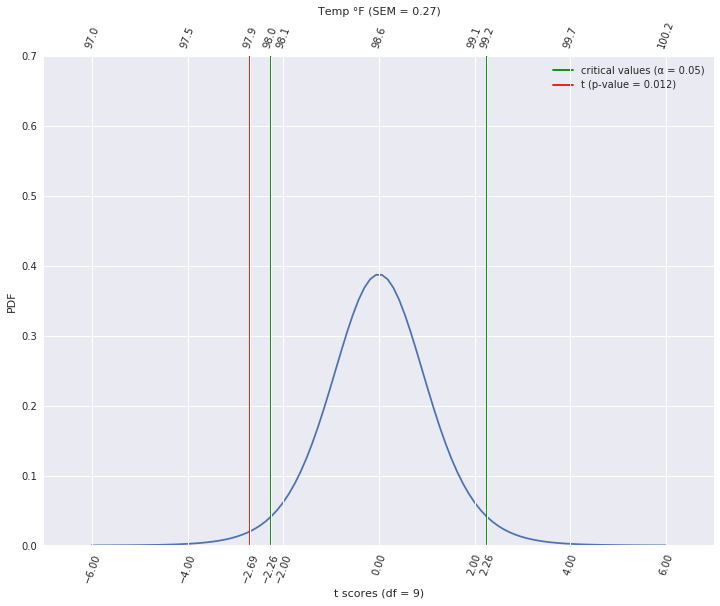

In [56]:
hf.plot_two_tailed_t_test(
    p_hypothesized_mean = 98.6, 
    p_data              = sample, 
    p_alpha             = .05, 
    p_data_content_desc = 'Temp \u00b0F'
)

### Run t-test with alpha of .01

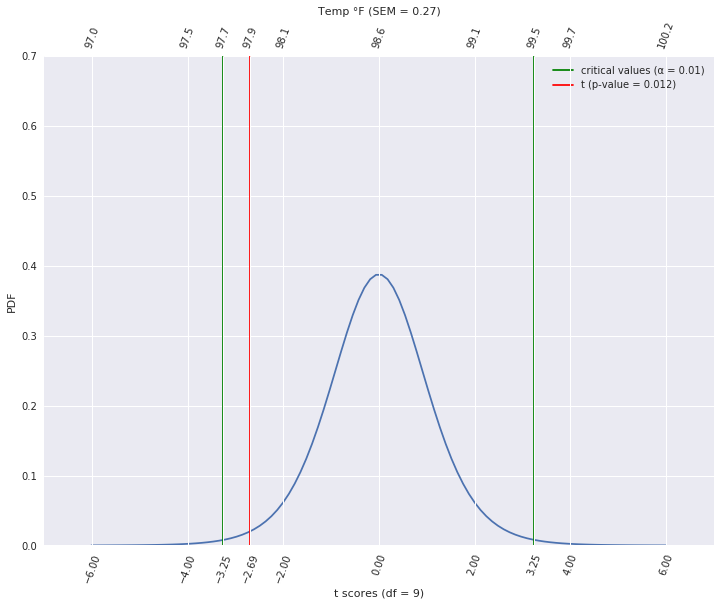

In [57]:
hf.plot_two_tailed_t_test(
    p_hypothesized_mean = 98.6, 
    p_data              = sample, 
    p_alpha             = .01, 
    p_data_content_desc = 'Temp \u00b0F'
)

### Run z-test with alpha of .05

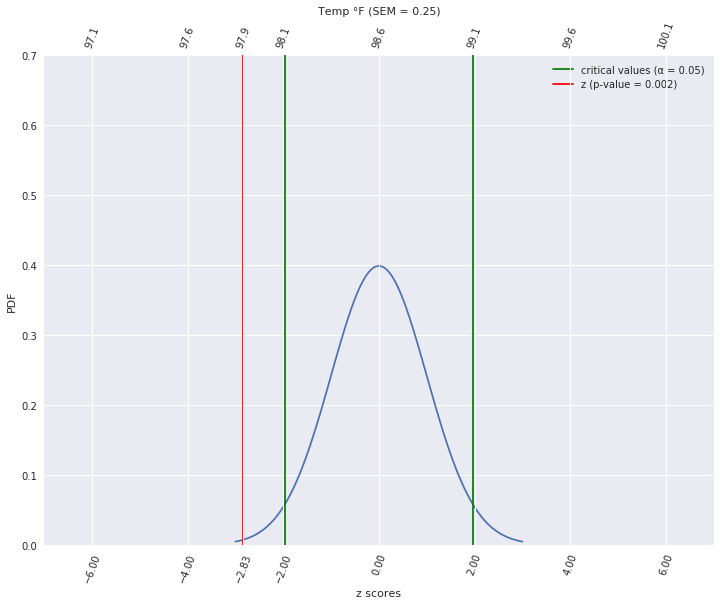

In [58]:
hf.plot_two_tailed_z_test(
    p_hypothesized_mean = 98.6, 
    p_data              = sample, 
    p_alpha             = .05, 
    p_data_content_desc = 'Temp \u00b0F'
)

### Run z-test with alpha of .01

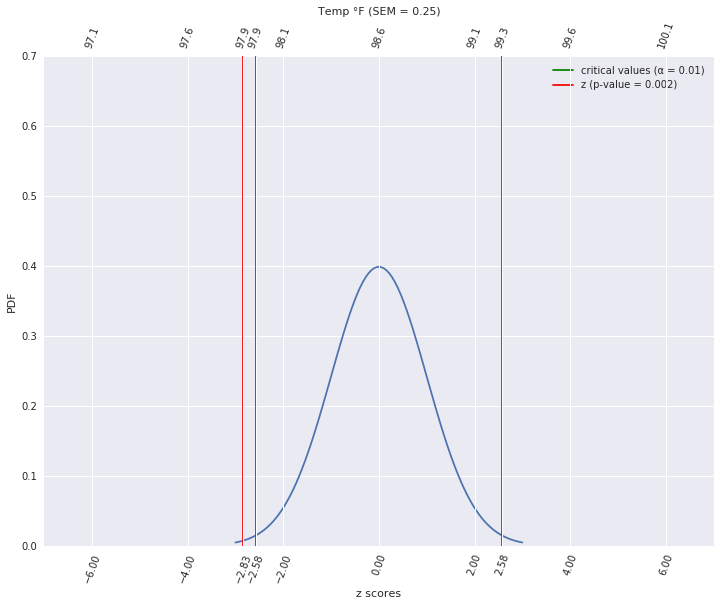

In [59]:
hf.plot_two_tailed_z_test(
    p_hypothesized_mean = 98.6, 
    p_data              = sample, 
    p_alpha             = .01, 
    p_data_content_desc = 'Temp \u00b0F'
)

---
## **Question 5**: At what temperature should we consider someone's temperature to be "abnormal"?
- The null hypothesis was rejected with a 99.9% confidence interval, but analysis of abnormal values at different levels may be helpful.
- As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
- Start by computing the margin of error and confidence interval. 
- When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

---
### Using the frequentist approach

---

#### **Incorrect way** - using the confidence interval for the mean of N draws:
- See: https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

In [60]:
result = hf.get_ci_sigma_unknown(
    p_data  = temp_vals, 
    p_alpha = .05)

hf.print_namedtuple(result)

sample_mean               : 98.24923076923075
sample_std                : 0.7331831580389456
sample_size               : 130
alpha                     : 0.05
sem                       : 0.06430441683789102
confidence_level_pct      : 97.5
critical_t_statistic      : 1.978524491458605
margin_of_error           : 0.1272278636227305
confidence_interval       : [98.12200291 98.37645863]


#### Note:
- Clearly, "abnormal" here is not truly abonormal in the common sense of the term
- I.e. eventhough 98.5 is beyond the 99.5% confidence interval, it nevertheless, it just a normal temperature

---

#### **Correct way** - using the **prediction interval** for a single draw:
- See: https://stackoverflow.com/questions/28242593/correct-way-to-obtain-confidence-interval-with-scipy?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa
    - Intuitively, these formulas make sense, since if you hold up a jar of jelly beans and ask a large number of people to guess the number of jelly beans, each individual may be off by a lot -- the same std deviation sigma -- but the average of the guesses will do a remarkably fine job of estimating the actual number and this is reflected by the standard deviation of the mean shrinking by a factor of 1/sqrt(N).
- An individual's temperature is one sample, it should be evaluated by the sample statistics for an individual
- https://stats.stackexchange.com/questions/16493/difference-between-confidence-intervals-and-prediction-intervals

In [61]:
pi = stats.norm.interval(
    0.95, 
    loc   = np.mean(temp_vals), 
    scale = np.std(temp_vals)
)

print('95% Prediction Interval:', pi)

95% Prediction Interval: (96.81775582674821, 99.68070571171329)


---
### Using the boostrap approach

#### This is **incorrect** being that its not for a single draw

In [62]:
bs_replicates = hf.draw_bootstrap_replicates(temp_vals, np.mean, 10000)

In [63]:
lower_critical_value, upper_critical_value = hf.get_two_tailed_critical_values(p_alpha = .01)

lower_critical_value, upper_critical_value

(0.005, 0.995)

In [64]:
ci = np.percentile(bs_replicates, [lower_critical_value, upper_critical_value])

print('99.9% Confidence Interval:', ci)

99.9% Confidence Interval: [98.02615331 98.0988385 ]


---
## **Question 6**: Is there a significant difference between males and females in normal temperature?

- **Question:** What testing approach did you use and why?

- **Answer:** 
    - A permutation test will work great here since it exactly simulates the null hypothesis. 
    - A two-sample t-test is also appropriate since the means of two independent samples are compared. 
    - Also see my answer to question 1 above that has some graphical EDA on the differences between males and females


---
### Visualizing permutation sampling

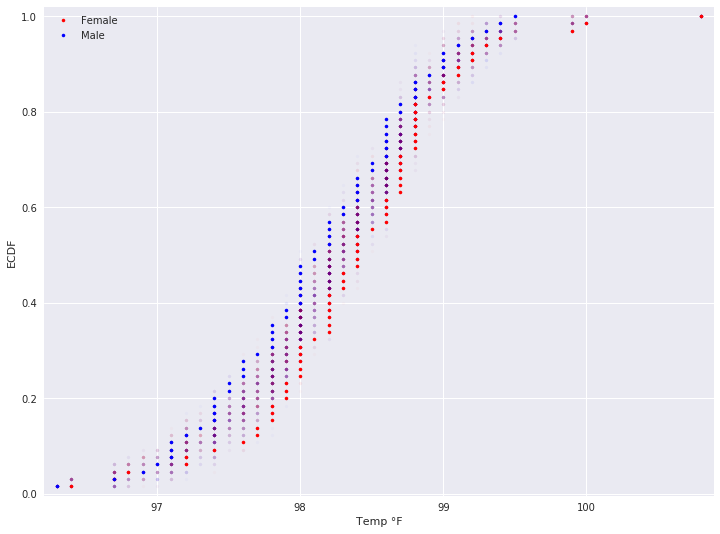

In [67]:
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for _ in range(100):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = hf.permutation_sample(
        temp_f_vals, 
        temp_m_vals
    )

    # Compute ECDFs
    x_1, y_1 = hf.ecdf(perm_sample_1)
    x_2, y_2 = hf.ecdf(perm_sample_2)

    
    # Plot ECDFs of permutation sample
    _ = plt.plot(
        x_1, 
        y_1, 
        marker    = '.', 
        linestyle = 'none',
        color     = 'red', 
        alpha     = 0.02
    )
    
    _ = plt.plot(
        x_2, 
        y_2, 
        marker    = '.', 
        linestyle = 'none',
        color     = 'blue', 
        alpha     = 0.02
    )    
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Create and plot ECDFs from original data
x_1, y_1 = hf.ecdf(temp_f_vals)
x_2, y_2 = hf.ecdf(temp_m_vals)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',  label = 'Female')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', label = 'Male')
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Label axes, set margin, and show plot
_ = plt.legend(loc='upper left')
_ = plt.margins(0.02)
_ = plt.xlabel('Temp \u00b0F')
_ = plt.ylabel('ECDF')
plt.show()
# -- ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Result:
- Notice that the permutation samples ECDFs overlap and give a purple haze. 
- Some of the ECDFs from the permutation samples overlap with the observed data, however its for the most part rare. 
- This suggests that a hypothesis that they're identical is not commensurate with the data. 
- However the difference appears small.

### Let's get the p-value using permutation samples

In [71]:
empirical_diff_means = hf.diff_of_means(temp_f_vals, temp_m_vals)

empirical_diff_means

0.2892307692307696

In [74]:
# Draw 10,000 permutation replicates
perm_replicates = hf.draw_permutation_replicates(
    temp_f_vals, 
    temp_m_vals,
    hf.diff_of_means, 
    size=10000
)

len(perm_replicates)

10000

In [75]:
# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

print('p-value =', p)

p-value = 0.0113


### Result:
- With a p-value of 0.0113, the null hypothesis is rejected; however, the significance is small.

---
### Let's run a two sample t-test:


In [81]:
t_statistic, p_value = stats.ttest_ind(temp_f_vals, temp_m_vals)

print('t-statistic :', t_statistic)
print('p-value     :', p_value)

t-statistic : 2.2854345381656103
p-value     : 0.02393188312239561


In [87]:
# Get the lower and upper critical boundary values
lower_critical_value, upper_critical_value = hf.get_two_tailed_critical_values(p_alpha = .05)

sample_size = len(temp_f_vals)
df = sample_size - 1

# Get the lower and upper critical boundary t scores
lower_critical_t = stats.t.ppf(lower_critical_value, df)

upper_critical_t = stats.t.ppf(upper_critical_value, df)


In [88]:
lower_critical_value, upper_critical_value

(0.025, 0.975)

In [89]:
lower_critical_t, upper_critical_t

(-1.9977296536259739, 1.9977296536259734)

In [90]:
if lower_critical_t <= t_statistic <= upper_critical_t:
    print('Do not reject null hypothesis')
else:
    print('Reject null hypothesis')

Reject null hypothesis


### Result:
- A two-sample t-test returned a t-statistic of 2.29 and p-value of 0.024, so here too, the null hypothesis is rejected. 
- The difference in human body temperatures between females and males, though significant, is not extreme. 
- Women tend to have a slightly higher body temperature.